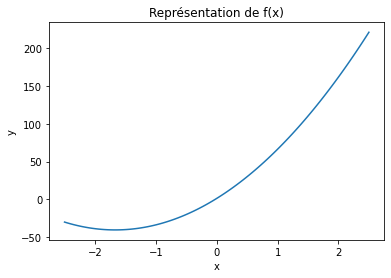

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return tf.exp(x - 2) + 15 * (x ** 2) + 50 * x + 1

x = np.linspace(-2.5, 2.5, 100)
y = f(x)

plt.plot(x, y)
plt.title('Représentation de f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

In [ ]:
'''
La valeur approximative de x qui minimise la fonction est d'environ -1.7
'''

In [3]:
x = tf.Variable(-1.0)
learning_rate = 0.001
nb_iteration = 1000

for i in range(nb_iteration):
    with tf.GradientTape() as tape:
        function = f(x)
    grad = tape.gradient(function, x)
    x.assign(x - learning_rate * grad)
    
print('Solution : ', x.numpy())

Solution :  -1.6675161


In [ ]:
'''
La valeur qui minimise x est à égale à environ -1.6675, ce qui est logique selon notre estimation visuelle de -1,7
'''

In [4]:
print('La valeur du gradient est de : ', grad.numpy())

La valeur du gradient est de :  5.722046e-05


In [ ]:
'''
La valeur du gradient est cohérente car elle est censée être très proche de 0. 
'''

# Problème de régression : Détection de la boîte englobant le visage

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

X = []
for p in os.listdir('imgs'):
    X.append(plt.imread('imgs/'+p))
    
X = np.array(X)
print('Shape of X : ', X.shape)

Shape of X : (1210, 256, 256, 3)

In [ ]:
import pandas as pd

df = pandas.read_csv('face_boxe.csv')
print('Taille du fichier : ', len(df))
df.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
j=1

for i in np.random.randint(0, len(df), size = [8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    img = X[i]
    plt.imshow(img)
    x_min = df.xmin[i]
    x_max = df.xmax[i]
    y_min = df.ymin[i]
    y_max = df.ymax[i]
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], '-b')
    J+=1

- Mettre en forme les données

In [ ]:
df['xmoy'] = ((df['xmax'] + df['xmin']) / 2) / 256
df['ymoy'] = ((df['ymax'] + df['ymin']) / 2) / 256
df['w'] = (df['xmax'] - df['xmin']) / 256
df['h'] = (df['ymax'] - df['ymin']) / 256

my_col = [xmoy', 'ymoy', 'w', 'h']
df = df[my_col]



Séparer le jeu de données en un ensemble d'entrainement et en un ensemble de validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df, test_size = 0.2)

En vous inspirant de l'image précédente, définir un modèle convolutionnel permettant d'estimer les paramètres X, Y, w et h

In [1]:
import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.models import Sequential

model = Sequential()
# Part 1
model.add(Conv2D(8, (5, 5), padding='same',input_shape=[256,256,3]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(4))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       608       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 8)       32        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 8)       1608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 8)       32        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 8)       0

In [19]:
def loss_function(y_true, y_pred):
    return tf.square(y_true[:,0]-y_pred[:,0]) + tf.square(y_true[:,1]-y_pred[:,1]) + tf.square(tf.sqrt(tf.abs(y_true[:,2])) - tf.sqrt(tf.abs(y_pred[:,2]))) + tf.square(tf.sqrt(tf.abs(y_true[:,3])) - sqrt(abs(y_pred[:,3])))
    

In [ ]:
model.compile(optimizer="adam", loss=loss_function)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), verbose=1, batch_size=64, epochs=10)

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img

In [ ]:
import numpy as np
def show_img(img, x0, y0, w0, h0):
    plt.imshow(img)
    x0 = np.abs(x0)
    y0 = np.abs(y0)
    w0 = np.abs(w0)
    h0 = np.abs(h0)
    x1 = (x0 - w0 /2)*256
    x2 = (x0 + w0 /2)*256
    y1 = (y0 - h0 /2)*256
    y2 = (y0 + h0 /2)*256
    plt.plot([x1,x1,x2,x1,x1], [y1,y1,y2,y2,y1], 'r')

x0,y0,w0,h0 = model.predict(X_test[0])[0]
show_img(X_test[0], x0, y0, w0, h0)

- Exécuter la cellule suivante pour charger un modèle entrainé sur ce jeu de données plus de 5 heures

- Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img

In [ ]:
x0,y0,w0,h0 = model.predict(X_test[0])[0]
show_img(X_test[0], x0, y0, w0, h0)

- Avec la fonction url_to_image, vous pouvez charger une image à partir d'un lien URL.
- Prédire le rectangle encadrant le visage avec des images sur internet.

In [ ]:
import urllib
import cv2
def url_to_image(url):
    resp = urllib.resquest.urlopen(url)
    img = np.asarray(bytearray(resp.read()), dtype = 'uint8')
    img = cv2.imdecode(img, -1)
    img = cv2.resize(img[:,:,[2,1,0]], (256, 256))
    return img

##Example :
img = url_to_image("https://starbyface.com/ImgBase/testPhoto/test1.jpg")

x0,y0,w0,h0 = model.predict(img)[0]
show_img(img, x0, y0, w0, h0)

# Evaluation : Intersection over Union (partie optionnelle)

In [ ]:
import numpy as np

def iou(y_true, y_pred):
    x1 = tf.constant(y_true[0]) 
    y1 = tf.constant(y_true[1])
    w1 = tf.constant(y_true[2])
    h1 = tf.constant(y_true[3]) 
    x2 = tf.abs(tf.constant(y_pred[0]))
    y2 = tf.abs(tf.constant(y_pred[1]))
    w2 = tf.abs(tf.constant(y_pred[2]))
    h2 = tf.abs(tf.constant(y_pred[3]))
    xA = tf.maximum(x1 - w1/2, x2 - w2/2)
    yA = tf.maximum(y1 - h1/2, y2 - h2/2)
    xB = tf.minimum(x1 + w1/2, x2 + w2/2)
    yB = tf.minimum(y1 + h1/2, y2 + h2/2)
    A_inter = tf.matmul(tf.maximum(xB - xA, 0), tf.maximum(yB - yA, 0))
    A_union = tf.matmul(w1,h1) + tf.matmul(w2,h2) - A_inter
    return A_inter / A_union

- Calculer la métrique IoU de notre modèle sur l'échantillon de validation

In [ ]:
x_pred = []
y_pred = []
w_pred = []
h_pred = []

for img in X_test:
    x0, y0, w0, h0 = model.predict(img)
    x_pred.append(x0)
    y_pred.append(y0)
    w_pred.append(w0)
    h_pred.append(h0)
pred = pd.DataFrame({'x' : x_pred,
                     'y' : y_pred,
                     'w' : w_pred,
                     'h' : h_pred})

result_iou = iou(y_test, pred)
print(result_iou)
